FASTER RCNN ON PRE-TRAINED DATASET

In [1]:
# Import the TensorFlow library
import tensorflow as tf
# Print the TensorFlow version
tf.__version__

'2.16.1'

In [2]:
# Import necessary libraries
import numpy as np  # Numerical computing library
import os  # Operating system interface
import PIL
import json  # JSON encoder and decoder
import cv2  # OpenCV library for image processing
import random  # Random number generation
import torch  # PyTorch deep learning framework
import torchvision  # PyTorch's computer vision library
import matplotlib.pyplot as plt

In [3]:
# Change the current working directory to 'detectron2'
%cd C:\Users\sbboo\OneDrive\Desktop\akka\detectron2

C:\Users\sbboo\OneDrive\Desktop\akka\detectron2


In [4]:
# Use the Python interpreter to run the setup.py script with the build and develop commands
!python setup.py build develop

running build
running build_py
running build_ext
building 'detectron2._C' extension


C:\ProgramData\anaconda3\Lib\site-packages\torch\utils\cpp_extension.py:500: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
C:\ProgramData\anaconda3\Lib\site-packages\torch\utils\cpp_extension.py:381: UserWarning: Error checking compiler version for cl: [WinError 2] The system cannot find the file specified
  warnings.warn(f'Error checking compiler version for {compiler}: {error}')
error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/


In [5]:
# Import the setup_logger function from the detectron2.utils.logger module
from detectron2.utils.logger import setup_logger
# Call the setup_logger function without any arguments
setup_logger()

<Logger detectron2 (DEBUG)>

In [6]:
# Import the DefaultPredictor class from the detectron2.engine.defaults module
from detectron2.engine.defaults import DefaultPredictor

In [7]:
# Import necessary modules and functions from Detectron2 library
from detectron2 import model_zoo  # Module for accessing pre-trained models
from detectron2.config import get_cfg  # Function to create and customize configurations
from detectron2.utils.visualizer import Visualizer  # Class for visualizing detection results
from detectron2.data import MetadataCatalog, DatasetCatalog  # Classes for managing metadata and datasets

In [8]:
# Specify the path to the image file using a raw string (r"...")
image_path = r"C:\Users\sbboo\OneDrive\Desktop\akka\MINI PROJECT\DATA SET\COVERAGE DATASET\14t.tif"   #  = _file_path

# Read the image using cv2.imread() function
# 'im' will contain the image data if the file is successfully read
im = cv2.imread(image_path)

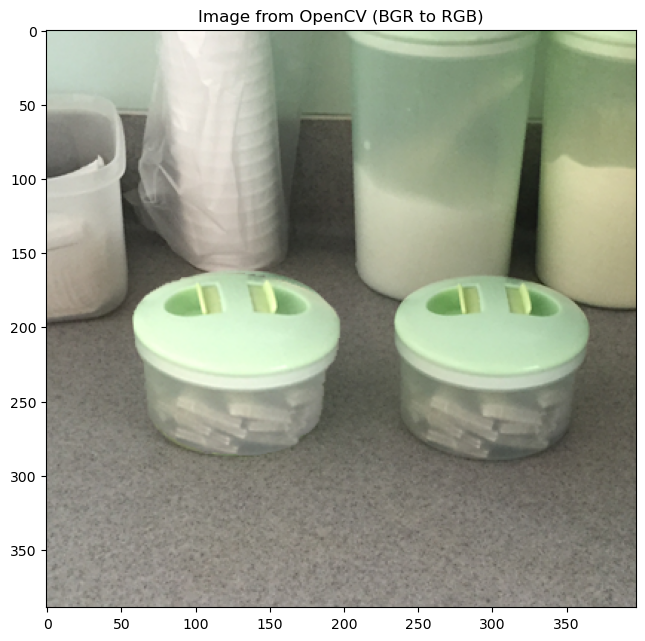

In [9]:
# Check if the image was loaded successfully
if im is None:
    print("Error: Unable to load image")
else:
    # Create a figure with a specified size (width, height)
    plt.figure(figsize=(15, 7.5))  
    
    # Display the image using plt.imshow()
    # The image is converted from BGR (OpenCV format) to RGB format using indexing [::-1]
    # This converts the color channels from Blue-Green-Red (BGR) to Red-Green-Blue (RGB)
    plt.imshow(im[..., ::-1])

    # Add a title to the plot
    plt.title('Image from OpenCV (BGR to RGB)')

    # Show the plot
    plt.show()


In [10]:
# Create a configuration object using Detectron2's get_cfg() function
cfg = get_cfg()

# Merge configuration settings from a YAML file
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")

# Set the threshold for detection scores (confidence scores)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Example threshold value: 0.5

# Specify the pre-trained weights for the model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

An exception occurred in telemetry logging.Disabling telemetry to prevent further exceptions.
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\iopath\common\file_io.py", line 946, in __log_tmetry_keys
    handler.log_event()
  File "C:\ProgramData\anaconda3\Lib\site-packages\iopath\common\event_logger.py", line 97, in log_event
    del self._evt
        ^^^^^^^^^
AttributeError: 'NativePathHandler' object has no attribute '_evt'


In [11]:
# Set the device for model inference to CPU
cfg.MODEL.DEVICE = "cpu"

# Create a DefaultPredictor object using the configured cfg
predictor = DefaultPredictor(cfg)

[04/12 03:49:17 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl ...


An exception occurred in telemetry logging.Disabling telemetry to prevent further exceptions.
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\iopath\common\file_io.py", line 946, in __log_tmetry_keys
    handler.log_event()
  File "C:\ProgramData\anaconda3\Lib\site-packages\iopath\common\event_logger.py", line 97, in log_event
    del self._evt
        ^^^^^^^^^
AttributeError: 'NativePathHandler' object has no attribute '_evt'


In [12]:
# Make predictions on the input image using the predictor object
outputs = predictor(im)

C:\ProgramData\anaconda3\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [13]:
# Print the predicted classes
print(outputs["instances"].pred_classes)

# Print the predicted bounding boxes
print(outputs["instances"].pred_boxes)

tensor([41, 41, 61])
Boxes(tensor([[2.0082e+02, 0.0000e+00, 3.3012e+02, 1.8152e+02],
        [3.2792e+02, 1.0953e-01, 3.9700e+02, 1.9483e+02],
        [5.5996e+01, 1.6055e+02, 1.9945e+02, 2.8886e+02]]))


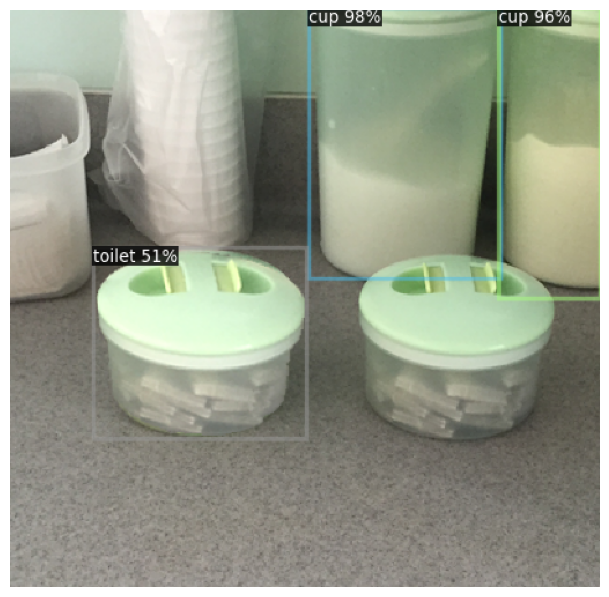

In [14]:
# Create a Visualizer object to draw instance predictions on the input image
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)

# Draw instance predictions on the image using the outputs from the model
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Define a custom function for displaying images using OpenCV and Matplotlib
def cv2_imshow(im):
    # Convert BGR image to RGB for Matplotlib
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    # Display the image using Matplotlib
    plt.figure(figsize=(25, 7.5))
    plt.imshow(im)
    plt.axis('off')
    plt.show()

# Display the drawn instance predictions using the custom imshow function
cv2_imshow(out.get_image()[:, :, ::-1])  # Convert BGR image to RGB for display


FASTER RCNN ON CUSTOM DATASET

In [15]:
from detectron2.data.datasets import register_coco_instances

# Register COCO-format dataset "my_dataset" with Detectron2
# The dataset is defined by the paths to the annotation JSON file and image directory
register_coco_instances(
    "my_dataset",  # Dataset name
    {},  # Additional metadata (empty dictionary in this case)
    r"C:\Users\sbboo\OneDrive\Desktop\akka\program\labels.json",  # Path to the COCO annotations JSON file
    r"C:\Users\sbboo\OneDrive\Desktop\akka\program\jpg dataset"  # Path to the image directory
)


In [16]:
# Register COCO-format validation dataset "my_dataset_val" with Detectron2
# The dataset is defined by the paths to the annotation JSON file and image directory
register_coco_instances(
    "my_dataset_val",  # Dataset name
    {},  # Additional metadata (empty dictionary in this case)
    r"C:\Users\sbboo\OneDrive\Desktop\akka\program\labels.json",  # Path to the COCO annotations JSON file
    r"C:\Users\sbboo\OneDrive\Desktop\akka\program\jpg dataset"  # Path to the image directory
)

In [17]:
# Get the metadata for the training dataset "my_dataset"
train_metadata = MetadataCatalog.get("my_dataset")

# Get the dataset dictionaries for the training dataset "my_dataset"
train_dataset_dicts = DatasetCatalog.get("my_dataset")

[04/12 03:49:19 d2.data.datasets.coco]: Loaded 198 images in COCO format from C:\Users\sbboo\OneDrive\Desktop\akka\program\labels.json


In [18]:
#Get the metadata for the validation dataset "my_dataset_val"
val_metadata = MetadataCatalog.get("my_dataset_val")

# Get the dataset dictionaries for the validation dataset "my_dataset_val"
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

[04/12 03:49:19 d2.data.datasets.coco]: Loaded 198 images in COCO format from C:\Users\sbboo\OneDrive\Desktop\akka\program\labels.json


In [19]:
from matplotlib import pyplot as plt

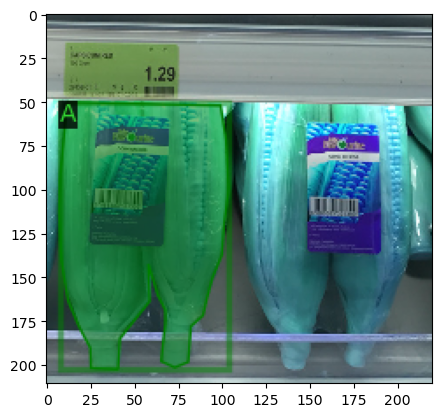

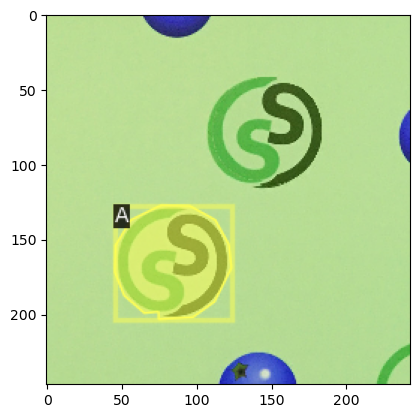

In [20]:
import random  # Import the random module

# Loop through two random samples from the training dataset
for d in random.sample(train_dataset_dicts, 2):
    # Read the image using OpenCV
    img = cv2.imread(d["file_name"])
    
    # Create a Visualizer object for the image
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    
    # Draw dataset annotations on the image
    vis = visualizer.draw_dataset_dict(d)
    
    # Display the annotated image using Matplotlib
    plt.imshow(vis.get_image()[:, :, ::-1])  # Convert BGR to RGB for Matplotlib
    plt.show()  # Show the image


In [21]:
from detectron2.engine import DefaultTrainer
import os  # Import os module for file operations

# Create a configuration object
cfg = get_cfg()

# Set the output directory where training results will be saved
cfg.OUTPUT_DIR = r"C:\Users\sbboo\OneDrive\Desktop\akka\program\outputs"   #**************************************9987665554*********************

# Merge additional configuration settings from a YAML file
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")

# Set model-specific configurations
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"  # Pretrained weights
cfg.MODEL.DEVICE = "cpu"  # Set device to CPU for training

# Set training dataset and dataloader configurations
cfg.DATASETS.TRAIN = ("my_dataset",)  # Training dataset name
cfg.DATASETS.TEST = ()  # No test dataset for now  
cfg.DATALOADER.NUM_WORKERS = 0  # Number of data loading processes

# Set solver configurations
cfg.SOLVER.IMS_PER_BATCH = 2  # Batch size
cfg.SOLVER.BASE_LR = 0.00025  # Learning rate
cfg.SOLVER.MAX_ITER = 1000  # Maximum number of iterations
cfg.SOLVER.STEPS = []  # Learning rate steps (no decay)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256  # Batch size per image
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # Number of classes (excluding background)

# Create the output directory if it doesn't exist
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Create an instance of DefaultTrainer with the given configuration
trainer = DefaultTrainer(cfg)

# Load a pretrained model if available (resume training) or start training from scratch
trainer.resume_or_load(resume=False)


[04/12 03:49:20 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[04/12 03:49:20 d2.data.datasets.coco]: Loaded 198 images in COCO format from C:\Users\sbboo\OneDrive\Desktop\akka\program\labels.json
[04/12 03:49:20 d2.data.build]: Removed 0 images with no usable annotations. 198 images left.
[04/12 03:49:20 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|     A      | 291          |
|            |              |
[04/12 03:49:20 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[04/12 03:49:20 d2.data.build]: Using training sampler TrainingSampler
[04/12 03:49:20 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[04/12 03:49:20 d2.data.common]: Serializing 198 elements to byte tensors and concatenating them all ...
[04/12 03:49:20 d2.data.common]: Serialized dataset takes 0.16 

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, 

In [22]:
import yaml  # Import the yaml module for YAML file operations

# Specify the path for the config YAML file
config_yaml_path = r"C:\Users\sbboo\OneDrive\Desktop\akka\program\outputs\config.yaml"

# Save the configuration to the config.yaml file
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)


In [23]:
import os  # Import the os module

# Set the path to the trained model's weights file
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

# Set a custom testing threshold for the model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

# Create a DefaultPredictor object for inference
predictor = DefaultPredictor(cfg)


[04/12 03:49:21 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from C:\Users\sbboo\OneDrive\Desktop\akka\program\outputs\model_final.pth ...


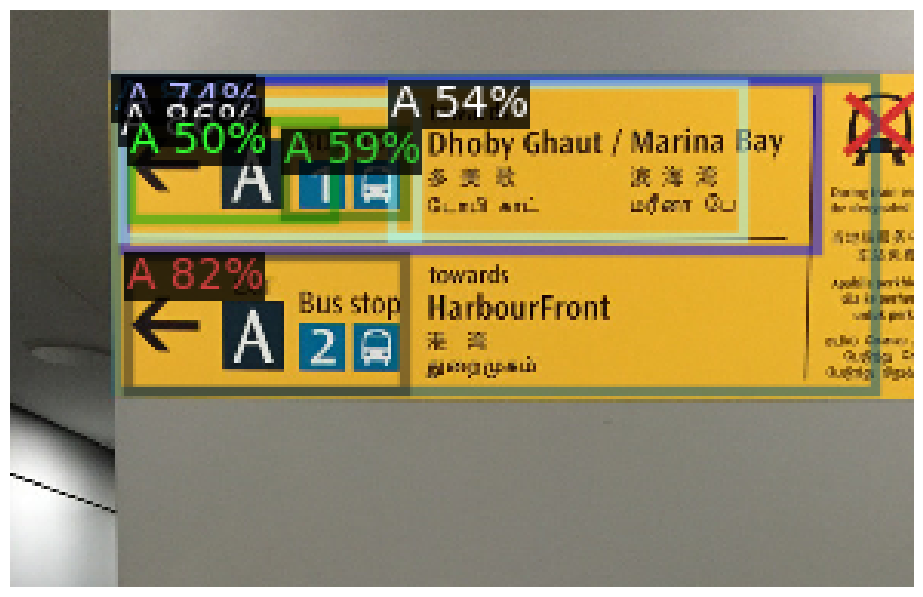

In [24]:
from detectron2.utils.visualizer import ColorMode

# Loop through a random sample of images from the validation dataset for display
for d in random.sample(val_dataset_dicts, 1):  # Select number of images for display
    # Read the image using OpenCV
    im = cv2.imread(d["file_name"])
    
    # Use the predictor to make predictions on the image
    outputs = predictor(im)
    
    # Create a Visualizer object with specified parameters
    v = Visualizer(im[:, :, ::-1],  # Convert BGR to RGB for visualization
                   metadata=val_metadata,  # Metadata for the validation dataset
                   scale=0.5,
                   # instance_mode=ColorMode.IMAGE_BW  # Option to remove colors of unsegmented pixels (for segmentation models)
    )
    
    # Draw instance predictions on the image
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    # Display the visualized image using the custom imshow function
    cv2_imshow(out.get_image()[:, :, ::-1])  # Convert BGR to RGB for display


In [34]:
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import os
import cv2
import csv
import numpy as np
import shutil
from PIL import Image, ImageTk


# Function to extract bounding box coordinates from string
def extract_bbox_coords(bbox_str):
    bbox_str = bbox_str.strip('[]').split(',')
    return list(map(float, bbox_str))

# Function to perform CFA forgery detection
def cfa_forgery_detection(original_image, tampered_image, bounding_boxes):
    forgery_detected = False

    # Convert images to grayscale
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    tampered_gray = cv2.cvtColor(tampered_image, cv2.COLOR_BGR2GRAY)

    # Initialize mask to zeros
    mask = np.zeros_like(original_gray)

    # Iterate over bounding boxes
    for bbox in bounding_boxes:
        x, y, w, h = map(int, bbox)

        # Extract regions from original and tampered images based on bounding boxes
        original_region = original_gray[y:y+h, x:x+w]
        tampered_region = tampered_gray[y:y+h, x:x+w]

        # Apply Gaussian filter to reduce noise
        original_blur = cv2.GaussianBlur(original_region, (5, 5), 0)
        tampered_blur = cv2.GaussianBlur(tampered_region, (5, 5), 0)

        # Compute absolute difference between blurred regions
        diff = cv2.absdiff(original_blur, tampered_blur)

        # Apply adaptive thresholding to highlight differences
        _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

        # Add the thresholded image to the mask
        mask[y:y+h, x:x+w] |= thresh

        # If any forgery is detected, set the flag
        if np.any(thresh):
            forgery_detected = True

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize list to store bounding boxes of forged regions
    forged_regions_bboxes = []

    # Iterate over contours and extract bounding boxes
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        forged_regions_bboxes.append((x, y, x+w, y+h))  # Store bounding box coordinates

    # If any forged regions are detected, find the bounding box that encompasses all regions
    if forged_regions_bboxes:
        x_min = min(bbox[0] for bbox in forged_regions_bboxes)
        y_min = min(bbox[1] for bbox in forged_regions_bboxes)
        x_max = max(bbox[2] for bbox in forged_regions_bboxes)
        y_max = max(bbox[3] for bbox in forged_regions_bboxes)
        merged_bbox = (x_min, y_min, x_max, y_max)
    else:
        merged_bbox = None

    return forgery_detected, merged_bbox

def open_image():
    # Select a folder directory for input
    global input_images_directory
    input_images_directory = filedialog.askdirectory()
    if input_images_directory:
        input_folder_label.config(text="Input Folder:\n" + input_images_directory)
        print("Selected Input Folder:", input_images_directory)

def cfa_output_feature():
    # This function duplicates the functionality of open_image()
    global cfa_output_directory
    cfa_output_directory = filedialog.askdirectory()
    if cfa_output_directory:
        cfa_output_label.config(text="CFA Output Folder:\n" + cfa_output_directory)
        print("Selected CFA Output Folder:", cfa_output_directory)

def select_output_csv():
    # Select an output CSV file
    global output_csv_path
    output_csv_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
    if output_csv_path:
        output_csv_label.config(text="Output CSV:\n" + output_csv_path)
        selected_output_label.config(text="Selected Output CSV: " + output_csv_path)
        print("Selected Output CSV:", output_csv_path)

def faster_output_feature():
    # Select an output folder for saving images
    global faster_output_directory
    faster_output_directory = filedialog.askdirectory()
    if faster_output_directory:
        faster_output_label.config(text="Faster Output Folder:\n" + faster_output_directory)
        if 'selected_faster_output_label' in globals():
            selected_faster_output_label.config(text="Selected Faster Output Folder: " + faster_output_directory)
        else:
            print("selected_faster_output_label is not defined")
        print("Selected Faster Output Folder:", faster_output_directory)

def process_images():
    if not (input_images_directory and output_csv_path and cfa_output_directory and faster_output_directory):
        print("Please select input folder, output CSV, CFA output folder, and faster output folder.")
        return
    
    # Open the CSV file for writing
    with open(output_csv_path, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)

        # Write the header row in the CSV file
        csvwriter.writerow(["File Name", "Class Name", "Object Number", "Area", "Centroid", "BoundingBox"])

        # Loop over the images in the input folder
        for image_filename in os.listdir(input_images_directory):
            image_path = os.path.join(input_images_directory, image_filename)
            new_im = cv2.imread(image_path)

            # Perform prediction on the new image
            outputs = predictor(new_im)  # You need to adapt this part based on your Faster R-CNN implementation

            # Get the predicted bounding boxes and class labels
            boxes = outputs['instances'].pred_boxes.tensor.cpu().numpy()
            class_labels = outputs['instances'].pred_classes.cpu().numpy()

            # Write the object-level information to the CSV file
            for i, box in enumerate(boxes):
                object_number = i + 1  # Object number starts from 1
                area = None  # Area is not applicable for bounding boxes
                centroid = None  # Centroid is not applicable for bounding boxes
                bounding_box = box.tolist()  # Convert the bounding box numpy array to a list

                # Check if the corresponding class label exists
                if i < len(class_labels):
                    class_label = class_labels[i]
                    class_name = 'A'
                else:
                    # If class label is not available (should not happen), use 'Unknown' as class name
                    class_name = 'Unknown'

                # Write the object-level information to the CSV file
                csvwriter.writerow([image_filename, class_name, object_number, area, centroid, bounding_box])

    print("Object-level information saved to CSV file.", flush=True)

    # Simulate a process with a loading animation
    progress_bar.start()
    
    # Directory containing images
    images_dir = input_images_directory
    cfa_dir = cfa_output_directory
    fast_dir = faster_output_directory

    # Read bounding box information from CSV
    image_bbox_map = {}  # Map to store bounding boxes for each image
    with open(output_csv_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header if present
        for row in reader:
            filename = os.path.join(images_dir, row[0])
            bounding_box = extract_bbox_coords(row[5])
            
            # Add bounding box to the list of bounding boxes for this image
            if filename in image_bbox_map:
                image_bbox_map[filename].append(bounding_box)
            else:
                image_bbox_map[filename] = [bounding_box]
                
    # Iterate over original and tampered image pairs and perform forgery detection
    for original_filename, bounding_boxes in image_bbox_map.items():
        tampered_filename = original_filename[:-4] + 't.jpg'  # Construct tampered image filename
        original_image = cv2.imread(original_filename)
        tampered_image = cv2.imread(tampered_filename)

        if original_image is None or tampered_image is None:
            print(f"Error: Unable to load images {original_filename} or {tampered_filename}")
            continue

        forgery_detected, merged_bbox = cfa_forgery_detection(original_image, tampered_image, bounding_boxes)
        if forgery_detected:
            # Draw bounding box around the merged forged region on the tampered image
            tampered_image_with_box = tampered_image.copy()
            if merged_bbox:
                x_min, y_min, x_max, y_max = merged_bbox
                cv2.rectangle(tampered_image_with_box, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

            # Save the tampered image with bounding box in CFA output folder
            output_filename_tampered_cfa = os.path.join(cfa_dir, os.path.basename(tampered_filename))
            cv2.imwrite(output_filename_tampered_cfa, tampered_image_with_box)
            print(f"Forgery detected in {original_filename}. Tampered image with bounding box saved: {output_filename_tampered_cfa}")
            
            # Save the original image along with the tampered image in the CFA output folder
            output_filename_original = os.path.join(cfa_dir, os.path.basename(original_filename))
            cv2.imwrite(output_filename_original, original_image)
            print(f"Original image saved for {original_filename} in CFA folder: {output_filename_original}")
            
            # Perform prediction on the tampered image
            outputs = predictor(original_image)

            # Draw bounding boxes on the image
            v = Visualizer(original_image[:, :, ::-1], metadata=train_metadata)
            out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

            # Create the output filename with "_result" extension
            result_filename = os.path.splitext(os.path.basename(original_filename))[0] + "_result.png"
            
            # Save the segmented image in faster output folder
            faster_output_path = os.path.join(faster_output_directory, result_filename)
            cv2.imwrite(faster_output_path, out.get_image()[:, :, ::-1])
            
            # Perform prediction on the tampered image
            tampered_outputs = predictor(tampered_image)

            # Draw bounding boxes on the tampered image
            v = Visualizer(tampered_image[:, :, ::-1], metadata=train_metadata)
            tampered_out = v.draw_instance_predictions(tampered_outputs["instances"].to("cpu"))

            # Create the output filename with "_result" extension
            result_filename_tampered = os.path.splitext(os.path.basename(tampered_filename))[0] + "_result.png"

            # Save the segmented image in faster output folder for tampered image
            faster_output_path_tampered = os.path.join(faster_output_directory, result_filename_tampered)
            cv2.imwrite(faster_output_path_tampered, tampered_out.get_image()[:, :, ::-1])


        else:
            print(f"No forgery detected in {original_filename}")
            
            # Save the original image in the faster output folder
            output_filename_original = os.path.join(fast_dir, os.path.basename(original_filename))
            cv2.imwrite(output_filename_original, original_image)
            print(f"Original image saved for {original_filename} in fast folder: {output_filename_original}")
            
            # Perform prediction on the original image
            outputs = predictor(original_image)
            original_pred_output_path = os.path.join(fast_dir, os.path.basename(original_filename))
            cv2.imwrite(original_pred_output_path, original_image)
            print(f"Predictions saved for {original_filename} in fast folder: {original_pred_output_path}")

    progress_bar.stop()
    print("Image processing completed.")
    
    # Display original and tampered images with bounding boxes
    display_images_with_bboxes(input_images_directory, cfa_output_directory, faster_output_directory)

def display_images_with_bboxes(input_dir, cfa_dir, faster_dir):
    
    # Create a new window for displaying images
    display_window = tk.Toplevel(master)
    display_window.title("Image Comparison")
    display_window.geometry("950x400")

    # Title label
    title_label = tk.Label(display_window, text="Image Comparison", font=("Arial", 18, "bold"), pady=10)
    title_label.grid(row=0, column=0, columnspan=2)

    # Loop over the images in the input directory
    for i, image_filename in enumerate(os.listdir(input_dir)):
        if i >= 5:  # Display only first 5 images for simplicity
            break
        image_path = os.path.join(input_dir, image_filename)
        original_image = cv2.imread(image_path)

        # Load corresponding tampered image with bounding box
        tampered_filename = image_filename[:-4] + 't.jpg'
        tampered_image_path = os.path.join(cfa_dir, tampered_filename)
        tampered_image = cv2.imread(tampered_image_path)

        # Display original image
        original_image_label = tk.Label(display_window, text=f"Original Image - {image_filename}", font=("Arial", 12))
        original_image_label.grid(row=i + 1, column=0, padx=10, pady=10)
        original_image_label.img = ImageTk.PhotoImage(image=Image.fromarray(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)))
        original_image_label.configure(image=original_image_label.img)

        # Display tampered image with bounding box
        tampered_image_label = tk.Label(display_window, text=f"Tampered Image with Bounding Box - {tampered_filename}", font=("Arial", 12))
        tampered_image_label.grid(row=i + 1, column=1, padx=10, pady=10)
        tampered_image_label.img = ImageTk.PhotoImage(image=Image.fromarray(cv2.cvtColor(tampered_image, cv2.COLOR_BGR2RGB)))
        tampered_image_label.configure(image=tampered_image_label.img)

# Create the main Tkinter window
master = tk.Tk()

# Set window title and geometry
master.title("Enhanced Forgery Detection")
window_width = 500
window_height = 650  # Increased height to accommodate the progress bar
screen_width = master.winfo_screenwidth()
screen_height = master.winfo_screenheight()
x_coordinate = int((screen_width / 2) - (window_width / 2))
y_coordinate = int((screen_height / 2) - (window_height / 2))
master.geometry(f"{window_width}x{window_height}+{x_coordinate}+{y_coordinate}")
master.resizable(False, False)

# Create a frame as a panel
panel_frame = tk.Frame(master, bg="white")
panel_frame.pack(fill=tk.BOTH, expand=True)

# Set background color
master.config(bg="white")

# Title label
title_label = tk.Label(panel_frame, text="Enhanced Forgery Detection", font=("Arial", 18, "bold"), pady=10, bg="white")
title_label.pack()

# Description label
desc_label = tk.Label(panel_frame, text="Please select input, output CSV, and output image folders:", font=("Arial", 12), bg="white")
desc_label.pack()

# Input folder label
input_folder_label = tk.Label(panel_frame, text="Input Folder:\nNot Selected", font=("Arial", 10), bg="white")
input_folder_label.pack()

# Button to select input folder
input_button = tk.Button(panel_frame, text="Select Input Folder", command=open_image, padx=10, pady=5, bg="#4caf50", fg="white")
input_button.pack(pady=10)

# CFA output folder label
cfa_output_label = tk.Label(panel_frame, text="CFA Output Folder:\nNot Selected", font=("Arial", 10), bg="white")
cfa_output_label.pack()

# Button to select CFA output folder
cfa_output_button = tk.Button(panel_frame, text="Select CFA Output Folder", command=cfa_output_feature, padx=10, pady=5, bg="#4caf50", fg="white")
cfa_output_button.pack(pady=10)

# Faster output folder label
faster_output_label = tk.Label(panel_frame, text="Faster Output Folder:\nNot Selected", font=("Arial", 10), bg="white")
faster_output_label.pack()

# Button to select faster output folder
faster_output_button = tk.Button(panel_frame, text="Select Faster Output Folder", command=faster_output_feature, padx=10, pady=5, bg="#4caf50", fg="white")
faster_output_button.pack(pady=10)

# Output CSV label
output_csv_label = tk.Label(panel_frame, text="Output CSV:\nNot Selected", font=("Arial", 10), bg="white")
output_csv_label.pack()

# Button to select output CSV file
output_csv_button = tk.Button(panel_frame, text="Select Output CSV", command=select_output_csv, padx=10, pady=5, bg="#4caf50", fg="white")
output_csv_button.pack(pady=10)

# Button to start image processing
start_button = tk.Button(panel_frame, text="Start Processing", command=process_images, padx=10, pady=5, bg="#2196f3", fg="white")
start_button.pack(pady=10)

# Progress bar
progress_bar = ttk.Progressbar(panel_frame, orient=tk.HORIZONTAL, length=300, mode='indeterminate')

# Run the Tkinter event loop
master.mainloop()


Selected Input Folder: C:/Users/sbboo/OneDrive/Desktop/akka/program/input
Selected CFA Output Folder: C:/Users/sbboo/OneDrive/Desktop/akka/program/cfa output
selected_faster_output_label is not defined
Selected Faster Output Folder: C:/Users/sbboo/OneDrive/Desktop/akka/program/fast output


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\sbboo\AppData\Local\Temp\ipykernel_12284\1373157059.py", line 98, in select_output_csv
    selected_output_label.config(text="Selected Output CSV: " + output_csv_path)
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 1702, in configure
    return self._configure('configure', cnf, kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 1692, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: invalid command name ".!frame.!label7"


Object-level information saved to CSV file.
Forgery detected in C:/Users/sbboo/OneDrive/Desktop/akka/program/input\2.jpg. Tampered image with bounding box saved: C:/Users/sbboo/OneDrive/Desktop/akka/program/cfa output\2t.jpg
Original image saved for C:/Users/sbboo/OneDrive/Desktop/akka/program/input\2.jpg in CFA folder: C:/Users/sbboo/OneDrive/Desktop/akka/program/cfa output\2.jpg
Error: Unable to load images C:/Users/sbboo/OneDrive/Desktop/akka/program/input\2t.jpg or C:/Users/sbboo/OneDrive/Desktop/akka/program/input\2tt.jpg
Forgery detected in C:/Users/sbboo/OneDrive/Desktop/akka/program/input\3.jpg. Tampered image with bounding box saved: C:/Users/sbboo/OneDrive/Desktop/akka/program/cfa output\3t.jpg
Original image saved for C:/Users/sbboo/OneDrive/Desktop/akka/program/input\3.jpg in CFA folder: C:/Users/sbboo/OneDrive/Desktop/akka/program/cfa output\3.jpg
Error: Unable to load images C:/Users/sbboo/OneDrive/Desktop/akka/program/input\3t.jpg or C:/Users/sbboo/OneDrive/Desktop/akka/

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\sbboo\AppData\Local\Temp\ipykernel_12284\1373157059.py", line 255, in process_images
    display_images_with_bboxes(input_images_directory, cfa_output_directory, faster_output_directory)
  File "C:\Users\sbboo\AppData\Local\Temp\ipykernel_12284\1373157059.py", line 289, in display_images_with_bboxes
    tampered_image_label.img = ImageTk.PhotoImage(image=Image.fromarray(cv2.cvtColor(tampered_image, cv2.COLOR_BGR2RGB)))
                                                                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
cv2.error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

